# Homework 5 Solutions

Due by Feb 13th, 3:30 pm

## Instructions

* This submission has **two** components: 
    * (1) PDF of handwritten to Problems 1 and 2
    * (2) iPython notebook with coded solution to Problems 3 and 4.
Make sure your solutions are clear and legible! Staple your written assignment (if more than 1 page) & box your answers.

### Other important information

* __Make sure to title the homework assignment as LASTNAME_FIRSTNAME_Homework5 before submitting.__

* All plots generated must have an xlabel, a ylabel, and a caption that interprets the plot. Time profiles also require a legend. 

* To create a caption, add a new cell below a plot by using the option "Insert > Insert Cell below", then change the cell into a markdown cell by using "Cell > Cell Type > Markdown".

* Axis limits must be sensible, meaning that you may need to set the axis limits via kwargs "xlim" and "ylim" in order to make your plot more interpretable. 

* Make it clear which code cells correspond to a problem. Use markdown cells with headers if needed. 

------
#### <font color='magenta'>Need to update MASSpy to latest version: </font>

In [ ]:
import sys
!{sys.executable} -m pip install masspy -U

import mass
print(mass.__version__)

#### Version should be 0.1.0b3 - check

import mass
print(mass.__version__)

------

In [1]:
# Import stuff

from mass import (MassModel, MassMetabolite, MassReaction, Simulation, MassSolution, strip_time)
from mass.test import create_test_model
from mass.util.matrix import nullspace, left_nullspace, matrix_rank
from mass.visualization import (plot_time_profile, plot_phase_portrait, plot_tiled_phase_portraits)

from os import path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym

In [2]:
# Set some options - feel free to mess around with this to further beautify your displays

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.3f}'.format
S_FONT = {"size": "small"}
L_FONT = {"size": "large"}
INF = float("inf")

------
## Conceptual question
Question
Please submit your answers to the conceptual question as a **handwritten document**. Staple your written assignment (if more than 1 page) & box your answers.

### (1) Eigenvalues (20 possible pts)
> (i) For the following transient response types, draw a plot of the transient response and the root locus plot (eigenvalues in complex plane). Provide a real life example of such behavior in any biological or physical system, and a 1-2 sentence explanation of why the example would exhibit such a response.
* (a) Overshoot
* (b) Sustained oscillation
* (c) Damped oscillation 
* (d) "Smooth" landing

> (ii) What happens in a system if the real part of the eigenvalues is positive?

<font color='red'> **(i)** Solution (18 points) </font> 

![HW-5-1](./HW-5-1.png)

<font color='red'> 5 pts for root locus plot, 5 pts for the transient response, 8 pts for all response analysis (+1 pt each example, +1 pt each explanation - many different answers OK).   </font>


<font color='red'> **(ii)** Solution (2 pts for correct answer) </font> 

If the eigenvalues are positive then the oscillations will amplify over time, indicating that the system is unstable.

------
## Coding Questions

### (2) Simulate Glycolysis with Phosphate Exchange (28 possible pts)

Recommended Reading: 
> https://masspy.readthedocs.io/en/latest/notebooks/SB2_textbook/SB2-Chapter-10.html#Adding-phosphate-exchange-reaction-with-surrounding-plasma

Consider a model of glycolysis where the cytosolic phosphate groups ($P_{i, c}$) participate in exchange with the surrounding plasma such that:

$ \large{P_{i, plamsa} = P_{i,plasma,t\rightarrow \inf} +  (P_{i, plamsa,t=0} - P_{i,plasma,t\rightarrow \inf})e^{\frac{-t}{\tau_{1/2}}}}  $ 

**Where:** 
* The initial concentraion of external plasma at intial steady state, or $P_{i, plamsa,t=0} = 2.5$ 
* The rate paramter of cytosolic $P_i$ going to the plasma, or $k_{c\rightarrow plasma} = 0.23$ 
* The equilibrium constant between cytosolic and plasma-bound $P_i$, or $K_{eq} = 1$ 

**And:** 
* $t_{1/2}$ is the half-life of phosphate decay to plasma 
* $\tau_{1/2}$ is the exponential time constant for phosphate in the system

**Given $t_{1/2} = 6$, perturb the external plasma concentration of phosphate ($P_{i, plamsa}$) such that it has a steady state value that is half of its initial value.**

In addition to interpreting your original plot, please answer:
>1. What is the value of $\tau_{1/2}$?
>2. What is happening at $t_{1/2}$?
>3. What happens if $t_{1/2} = 12$? What is the value of $\tau_{1/2}$?


(HINT: Identify the external metabolite & read about 'boundary_metabolite': https://masspy.readthedocs.io/en/latest/autoapi/mass/core/mass_reaction/index.html#mass.core.mass_reaction.MassReaction.boundary_metabolite)

<font color='red'> Solutions to Numbered List </font> 

1. Define Half-life: $t_{1/2} = \tau_{1/2}*ln(2) \ \ \Rightarrow \tau_{1/2} = \frac{t_{1/2}}{ln(2)}  \simeq 1.44*t_{1/2} = 1.44*6 = 8.6 $


2. At $t_{1/2}$, nearly half of the phosphate that will be leave to plamsa for the new SS has already done so: $P_{i, plamsa,t=0} + \frac{1}{2}*(P_{i,plasma,t\rightarrow \inf} - P_{i, plamsa,t=0}) = 1.25+ \frac{1}{2}*(2.5 - 1.25) = 1.875 \simeq P_{i, c}$ \
*Not exact because of perturbation*


3. See second simulation below. Can observe that decline if less severe (which makes sense with a longer half-life). 
$ \tau_{1/2} = \frac{t_{1/2}}{ln(2)}  \simeq 1.44*t_{1/2} = 1.44*12 = 17.3 $ (longer lifetime / slower decay)

<font color='red'> Rubric (28 Total Points) </font> 

* 3 pts for boundary creation, 3 pts for correct perturbation, 3 pts for other aspects of model
* 3 pts for graph & 3 pts for interpretation

List items:
* (1) 2 pts for correct $\tau_{1/2}$ solution 
* (2) 3 pts for reasoning (include reference to perturbation)
* (3) 3 pts for graph & 3 pts for interpretation (can just be the answer to #3 - no separate caption needed). 2 pts for correct $\tau_{1/2}$ solution. 

<font color='red'> Note: pi_b not required to be graphed, but 2 pts extra credit available if student did the extra work </font> 

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


Time,0.000,6.000,12.000,24.000,50.000,100.000,150.000,200.000
pi_c,2.500,2.183,1.771,1.368,1.255,1.250,1.250,1.250
pi_b,2.500,1.875,1.562,1.328,1.254,1.250,1.250,1.250


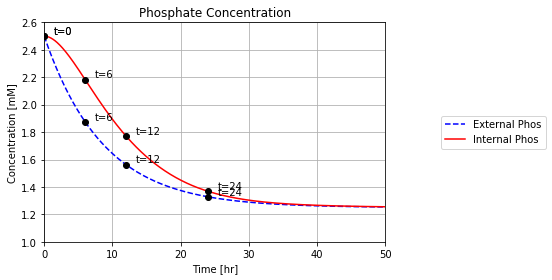

In [3]:
glycolysis = create_test_model("SB2_Glycolysis")
# Add phosphate exchange reaction
SK_pi_c = glycolysis.add_boundary(
    metabolite=glycolysis.metabolites.get_by_id("pi_c"),
    boundary_type="sink",  boundary_condition=2.5)

# Set forward rate constant
SK_pi_c.kf = 0.23
SK_pi_c.Keq = 1

t0, tf = (0, 200)
t_half = 6

sim = Simulation(glycolysis, verbose = True)
sim.integrator.variable_step_size = False
conc_sol, flux_sol = sim.simulate(
    glycolysis, time=(t0, tf, tf * 10 + 1),
    perturbations={"pi_b": "1.25 + (2.5 - 1.25) * exp(-t/({t_half}/ln(2)))".format(t_half=t_half)})

conc_sol.update({
    "pi_b": np.array(list(map(
        lambda t: 1.25 + (2.5 - 1.25) * np.exp(-t/(t_half/np.log(2))),
        conc_sol.to_frame().index)))})

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

time_points = [t0, 6, 12, 24]

plot_time_profile(
    conc_sol, observable=["pi_b"], ax=ax1, legend=["External Phos", "right outside"],
    plot_function="plot", title="Phosphate Concentration",
    xlabel="Time [hr]", ylabel="Concentration [mM]",
    xlim=(t0, tf/4), ylim=(1, 2.6), 
    annotate_time_points=time_points,
    annotate_time_points_labels=True,
    linestyle="--", color="blue",
    grid=("major", "both"))

plot_time_profile(
    conc_sol, observable=["pi_c"], ax=ax1, legend=["Internal Phos", "right outside"],
    plot_function="plot", title="Phosphate Concentration",
    xlabel="Time [hr]", ylabel="Concentration [mM]",
    xlim=(t0, tf/4), ylim=(1, 2.6), 
    annotate_time_points=time_points,
    annotate_time_points_labels=True,
    linestyle="-", color="red",
    grid=("major", "both"))

fig.tight_layout()
conc_sol.to_frame().loc[time_points + [tf/4, tf/2, 3*tf/4, tf], ["pi_c", "pi_b"]].T

**Interpretation:**

Concentration of total phosphate decreases due to our specification of there being less phosphate present as an external metabolite. This change will cause an exponential decay in the amount of total phosphate (both internal and external), and internal phosphate will lag a bit behind the external phosphate  as it makes its way outside of the system. 

Getting time points
Parsing perturbations
Setting simulation values for 'Glycolysis'
Simulating 'Glycolysis'
Simulation for 'Glycolysis' successful
Adding 'Glycolysis' simulation solutions to output
Updating stored solutions


Time,0.000,6.000,12.000,24.000,50.000,100.000,150.000,200.000
pi_c,2.500,2.173,1.754,1.357,1.254,1.250,1.250,1.250
pi_b,2.500,1.858,1.545,1.320,1.253,1.250,1.250,1.250


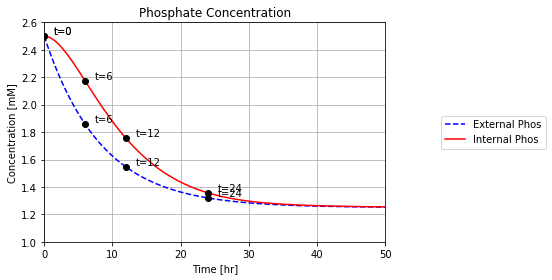

In [6]:
t_half = 12

conc_sol, flux_sol = sim.simulate(
    glycolysis, time=(t0, tf, tf * 10 + 1),
    perturbations={"pi_b": "1.25 + (2.5 - 1.25) * exp(-t/(ln(2) * {t_half}))".format(t_half=t_half)}, 
    verbose= True)

conc_sol.update({
    "pi_b": np.array(list(map(
        lambda t: 1.25 + (2.5 - 1.25) * np.exp(-t/(np.log(2) * t_half)),
        conc_sol.to_frame().index)))})

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

time_points = [t0, 6, 12, 24]

plot_time_profile(
    conc_sol, observable=["pi_b"], ax=ax1, legend=["External Phos", "right outside"],
    plot_function="plot", title="Phosphate Concentration",
    xlabel="Time [hr]", ylabel="Concentration [mM]",
    xlim=(t0, tf/4), ylim=(1, 2.6), 
    annotate_time_points=time_points,
    annotate_time_points_labels=True,
    linestyle="--", color="blue",
    grid=("major", "both"))

plot_time_profile(
    conc_sol, observable=["pi_c"], ax=ax1, legend=["Internal Phos", "right outside"],
    plot_function="plot", title="Phosphate Concentration",
    xlabel="Time [hr]", ylabel="Concentration [mM]",
    xlim=(t0, tf/4), ylim=(1, 2.6), 
    annotate_time_points=time_points,
    annotate_time_points_labels=True,
    linestyle="-", color="red",
    grid=("major", "both"))

fig.tight_layout() 
conc_sol.to_frame().loc[time_points + [tf/4, tf/2, 3*tf/4, tf], ["pi_c", "pi_b"]].T

### (3) Analyzing Glycolysis (24 possible pts)

Using a fresh glycolysis model, simulate with a 40% increase in ATP utilization as a perturbation. Create phase portraits & interpret the results for the following:

* (a) **Concentrations:**
    * Lactate vs. NAD
    * Lactate vs. NADH
    * NAD vs. NADH
* (b) **Fluxes:**
    * ATP maintenance requirement vs. AMP demand
    * ATP maintenance requirement vs. Pyruvate Sink
    * AMP demand vs. Pyruvate Sink
* (c) **Fluxes:**
    * Hexokinase vs. Phosphofructokinase
    * Hexokinase vs. Pyruvate kinase
    * Phosphofructokinase vs. Pyruvate kinase


<font color='red'> Rubric (24 Total Points) </font> 

* 2 pts for correct model setup, 2 pts for perturbation, 2 pts for timepoints (6 pts)
* 1 pt for each plot + 1 pt for explaining each plot (18 pts)


In [7]:
# Create glycolysis model
glycolysis = create_test_model("Glycolysis")

# Simulate SS (no perturbation)
sim_glycolysis = Simulation(glycolysis)

conc_sol_ss, flux_sol_ss = sim_glycolysis.simulate(
    glycolysis, time=(0, 1000))

# Simulate (with perturbation)
conc_sol, flux_sol = sim_glycolysis.simulate(
    glycolysis, time=(0, 1000),
    perturbations={"kf_ATPM": "kf_ATPM * 1.4"})

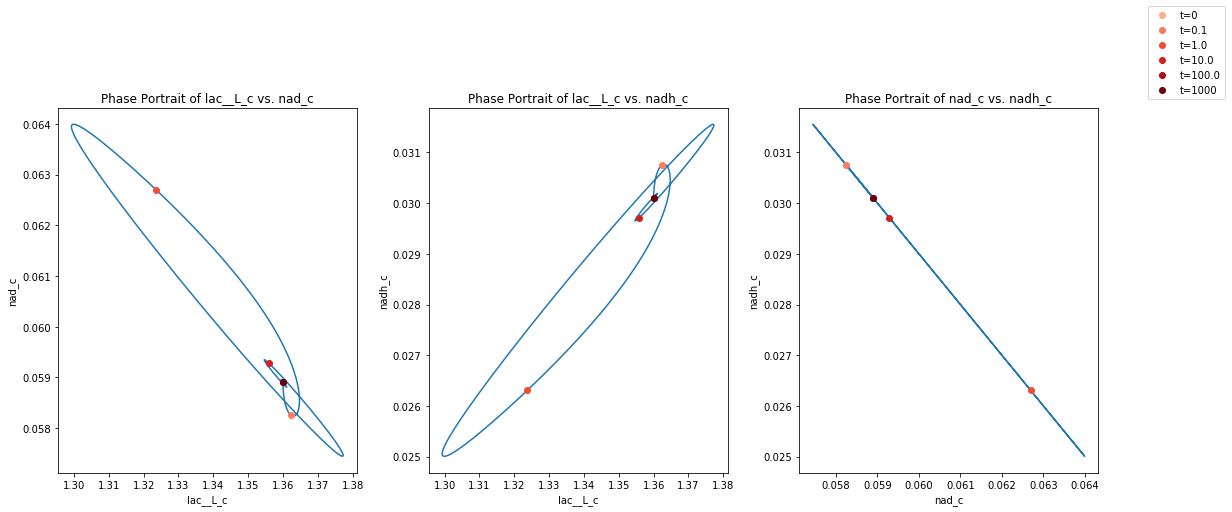

In [8]:
# Part (a) concentration portraits

fig_a, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 7),constrained_layout=True)
axes = axes.flatten()

pairings = [("lac__L_c", "nad_c"), ("lac__L_c", "nadh_c"), ("nad_c", "nadh_c")]

time_points = [0, 1e-1, 1e0, 1e1, 1e2, 1000]
time_point_colors = [
    mpl.colors.to_hex(c)
    for c in mpl.cm.Reds(np.linspace(0.3, 1, len(time_points)))]

for i, ax in enumerate(axes):
    x_i, y_i = pairings[i]
    # Create a legend for the points of interest
    if i == len(axes) - 1:
        legend="upper right outside"
    else:
        legend = None
    plot_phase_portrait(
        conc_sol, x=x_i, y=y_i, ax=ax,
        xlabel=x_i, ylabel=y_i,
        title=("Phase Portrait of {0} vs. {1}".format(x_i, y_i), L_FONT),
        annotate_time_points=time_points,
        annotate_time_points_color=time_point_colors,
        annotate_time_points_legend=legend)

**Interpretation:** NAD and NADH have a conservation relationship (last plot's slope is -1), which makes sense since all NAD must exist in either the oxidized or reduced form at any given time. Lactate vs. NAD and Lactate vs. NADH are near mirror images of each other, which makes sense since each is either generating/using NAD based on the direction of the pyruvate>lactate reaction.

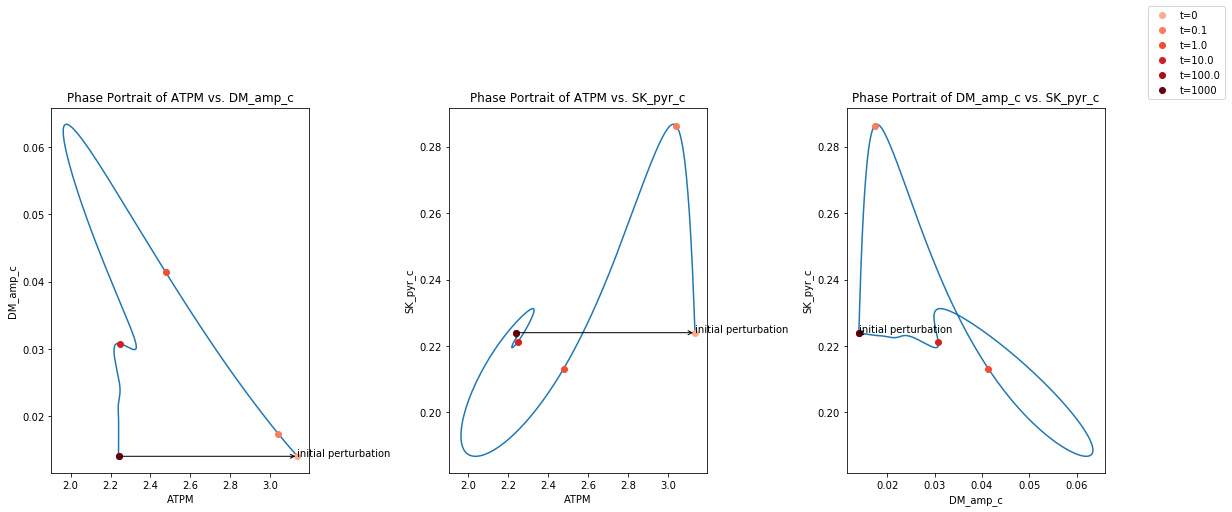

In [9]:
# Part (b) flux portraits

fig_b, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 7),constrained_layout=True)
axes = axes.flatten()

pairings = [("ATPM", "DM_amp_c"), ("ATPM", "SK_pyr_c"), ("DM_amp_c", "SK_pyr_c")]

for i, ax in enumerate(axes):
    x_i, y_i = pairings[i]
    # Create a legend for the points of interest
    if i == len(axes) - 1:
        legend="upper right outside"
    else:
        legend = None
    plot_phase_portrait(
        flux_sol, x=x_i, y=y_i, ax=ax,
        xlabel=x_i, ylabel=y_i,
        title=("Phase Portrait of {0} vs. {1}".format(x_i, y_i), L_FONT),
        annotate_time_points=time_points,
        annotate_time_points_color=time_point_colors,
        annotate_time_points_legend=legend)
    xy = (flux_sol[x_i][0], flux_sol[y_i][0])
    xytext = (flux_sol_ss[x_i][-1], flux_sol_ss[y_i][-1])
    ax.annotate("initial perturbation", xy=xy)
    ax.annotate("", xy=xy, xytext=xytext, textcoords="data",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

**Interpretation:** 
*First plot:* Initially, greater ATP utilization causes increased ATP maintenance. This gives causes an increase in AMP demand to meet the rising ATP. However, the system eventually settles back into the same steady state. 
*Second / Third plot:* As ATP utilization / ATP maintenance needs / AMP demand rises, the amount of pyruvate exiting the system also increases since glycolysis has been revved up to meet the ATP needs. However, the system eventually overcorrects itself then goes back to steady state (overcorrection may be related to need to re-generate NAD+ using the LDH reaction, that uses up pyruvate).

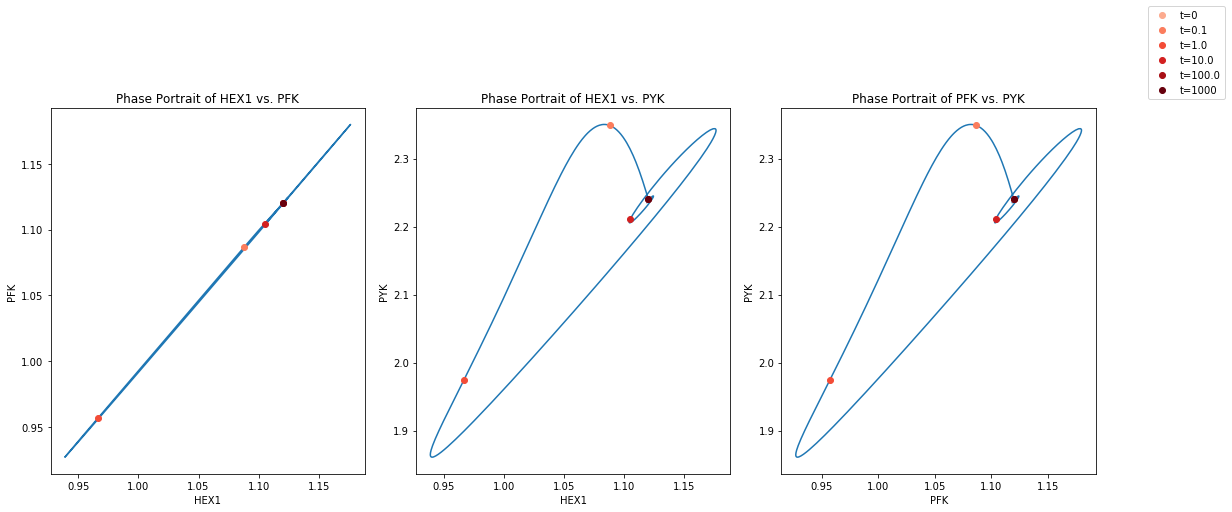

In [10]:
# Part (c) flux portraits

fig_c, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 7),constrained_layout=True)
axes = axes.flatten()

pairings = [("HEX1", "PFK"), ("HEX1", "PYK"), ("PFK", "PYK")]

for i, ax in enumerate(axes):
    x_i, y_i = pairings[i]
    # Create a legend for the points of interest24
    if i == len(axes) - 1:
        legend="upper right outside"
    else:
        legend = None
    plot_phase_portrait(
        flux_sol, x=x_i, y=y_i, ax=ax,
        xlabel=x_i, ylabel=y_i,
        title=("Phase Portrait of {0} vs. {1}".format(x_i, y_i), L_FONT),
        annotate_time_points=time_points,
        annotate_time_points_color=time_point_colors,
        annotate_time_points_legend=legend)
    

**Interpretation:** 
*First plot:* 1:1 ratio exhibits the soft conservation between the 2 rate-limiting steps of glycolysis.
*Second / Third plot:* PYK has very similar relationship with both PFK and HEX-1. The rate-limiting steps are dominating the dynamics.

### (4) Glycolysis topology (28 possible pts)

i. Define ***connectivity*** and ***participation number*** in context of the stoichiometric matrix. Include reference to network nodes and edges in your answer.


ii. Use your glycolysis model with a 40% increase in ATP utilization from question #3, and consider the ADP metabolite. Create plots to show the ADP node, edges connected to this node, and the relationship between the edges into and the edges out of this node. Interpret you results.

iii. What is the connectivity of ADP? What is the participation number for each of the reactions associated with the ADP node?

<font color='red'> **(i)** Solution (4 total pts, 2 pts each) </font> 

> Connectivity: The number of reactions in which a compound participates. This is the number of edges/links that are connected to a node.

> Participation Number: The number of compounds that participate in a certain reaction. This is the number of nodes that an edge/link touches. 

mass\visualization\visualization_util.py:806 UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


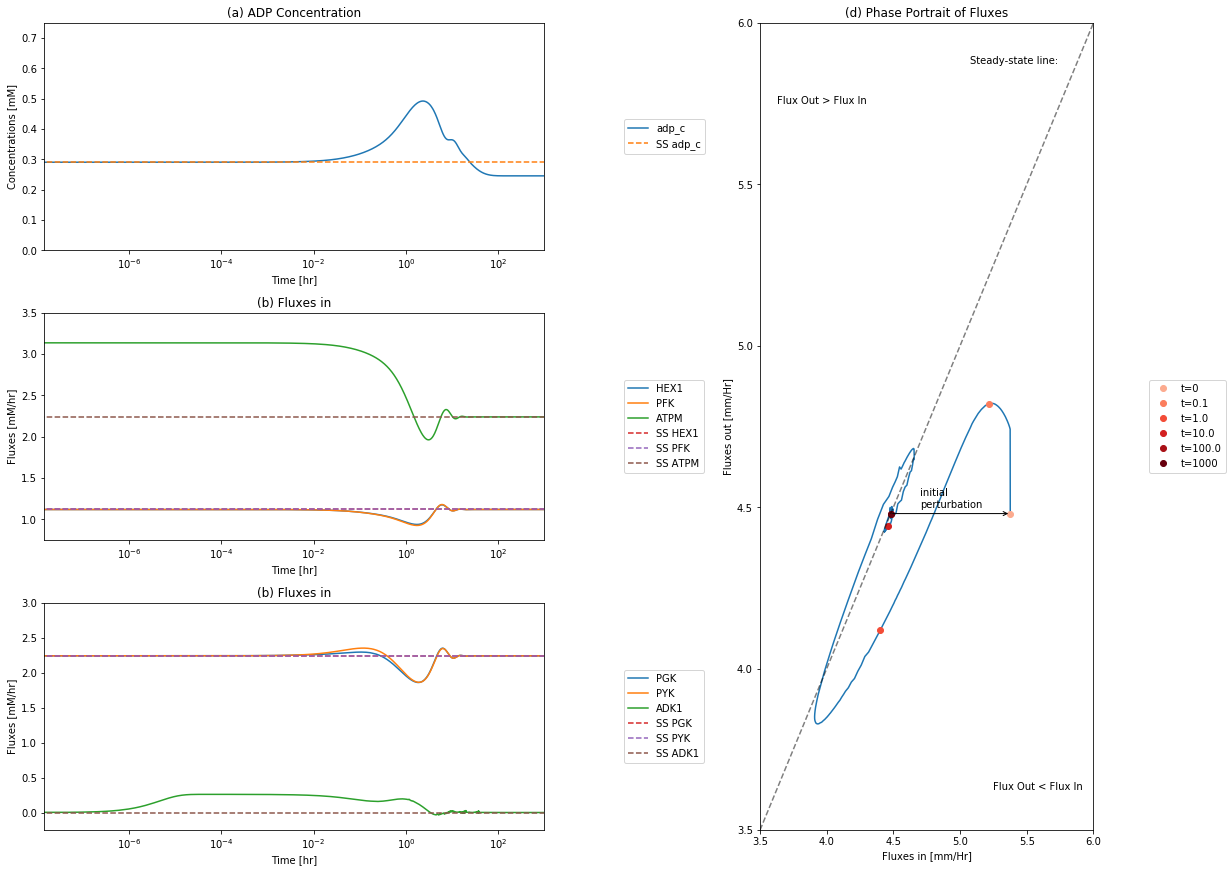

In [11]:
fig_q4 = plt.figure(constrained_layout=True, figsize=(17, 12))
gs = fig_q4.add_gridspec(nrows=3, ncols=2, width_ratios=[1.5, 1])

ax1 = fig_q4.add_subplot(gs[0, 0])
ax2 = fig_q4.add_subplot(gs[1, 0])
ax3 = fig_q4.add_subplot(gs[2, 0])
ax4 = fig_q4.add_subplot(gs[:, 1])

# Concentration Profile
plot_time_profile(
    conc_sol, observable="adp_c", ax=ax1,
    legend="right outside", plot_function="semilogx",
    xlim=(0, 1000), ylim=(0, 0.75),
    xlabel="Time [hr]", ylabel="Concentrations [mM]",
    title=("(a) ADP Concentration", L_FONT));
# Add SS Concentration for reference
plot_time_profile(
    conc_sol_ss, observable="adp_c", ax=ax1,
    legend=(['SS adp_c'], "right outside"), plot_function="semilogx",
    xlim=(0, 1000), ylim=(0, 0.75),
    xlabel="Time [hr]", ylabel="Concentrations [mM]",
    title=("(a) ADP Concentration", L_FONT), linestyle = '--');

# Flux In
fluxes_in = ["HEX1", "PFK","ATPM"]
plot_time_profile(
    flux_sol, observable=fluxes_in, ax=ax2,
    legend="right outside", plot_function="semilogx",
    xlim=(0, 1000), ylim=(0.75, 3.5),
    xlabel="Time [hr]", ylabel="Fluxes [mM/hr]",
    title=("(b) Fluxes in", L_FONT));
# Add SS Flux In for reference
plot_time_profile(
    flux_sol_ss, observable=fluxes_in, ax=ax2,
    legend=(['SS '+ flux for flux in fluxes_in], "right outside"), plot_function="semilogx",
    xlim=(0, 1000), ylim=(0.75, 3.5),
    xlabel="Time [hr]", ylabel="Fluxes [mM/hr]",
    title=("(b) Fluxes in", L_FONT), linestyle = '--');

#Flux Out
fluxes_out = ["PGK", "PYK", "ADK1"]
plot_time_profile(
    flux_sol, observable=fluxes_out, ax=ax3,
    legend="right outside", plot_function="semilogx",
    xlim=(0, 1000), ylim=(-.25, 3),
    xlabel="Time [hr]", ylabel="Fluxes [mM/hr]",
    title=("(c) Fluxes out", L_FONT));
# Add SS Flux Out for reference
plot_time_profile(
    flux_sol_ss, observable=fluxes_out, ax=ax3,
    legend=(['SS '+ flux for flux in fluxes_out], "right outside"), plot_function="semilogx",
    xlim=(0, 1000), ylim=(-.25, 3),
    xlabel="Time [hr]", ylabel="Fluxes [mM/hr]",
    title=("(b) Fluxes in", L_FONT), linestyle = '--');

# Phase portrait
for flux_id, variables in zip(["Net_Flux_In", "Net_Flux_Out"],
                              [fluxes_in, fluxes_out]):
    flux_sol.make_aggregate_solution(
        flux_id, equation=" + ".join(variables), variables=variables)

time_points = [0, 1e-1, 1e0, 1e1, 1e2, 1000]
time_point_colors = [
    mpl.colors.to_hex(c)
    for c in mpl.cm.Reds(np.linspace(0.3, 1, len(time_points)))]

plot_phase_portrait(
    flux_sol, x="Net_Flux_In", y="Net_Flux_Out", ax=ax4,
    xlim=(3.5, 6.0), ylim=(3.5, 6.0),
    xlabel="Fluxes in [mm/Hr]", ylabel="Fluxes out [mm/Hr]",
    title=("(d) Phase Portrait of Fluxes", L_FONT),
    annotate_time_points=time_points,
    annotate_time_points_color=time_point_colors,
    annotate_time_points_legend="right outside");


ax4.plot((3.5, 6.0), (3.5, 6.0), ls="--", color="black", alpha=0.5)
xy = (flux_sol["Net_Flux_In"][0], flux_sol["Net_Flux_Out"][0])
xytext = (sum([flux_sol_ss[rxn][-1] for rxn in fluxes_in]),
          sum([flux_sol_ss[rxn][-1] for rxn in fluxes_out]))
ax4.annotate("Steady-state line:", xy=(0.63, 0.95), xycoords="axes fraction");
ax4.annotate("Flux Out < Flux In", xy=(0.7, 0.05), xycoords="axes fraction");
ax4.annotate("Flux Out > Flux In", xy=(0.05, 0.9), xycoords="axes fraction");
ax4.annotate("initial\nperturbation", xy=xy, xytext=(4.7, 4.5), textcoords="data");
ax4.annotate("", xy=xy, xytext=xytext, textcoords="data",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"));

<font color='red'> **(ii)** Solution (20 total pts- 4 for model/perturbation, 2 pts for each graph above, and 2 pts for explaining each below) - graphs above </font> 

**Interpretation:**

a) Initially, more ADP is created as it is converted to ATP to meet the increased demand. Eventually, the ADP concentration decreases and stabilizes below the original steady state, since ADK1 forms AMP initially when ADP builds up and this leads to loss of AMP from the system (and $P_i$ available for both ATP and ADP).

b & c) ATP utilization intially increases due to the perturbation, but eventually equalizes out to the original steady state. Other fluxes also return to the original steady.- 2

d) Increase in ATP utilization perturbation initially causes more ADP to be created as ATP is utilized ($fluxes_{in} > fluxes_{out}$). However, the system eventually moves back to the initial steady state balance

<font color='red'> **(iii)** Solution (4 total pts, 1 for connectivity & 0.5 for each PN) </font> 

> ADP connectivity: 6, b/c 3 flux in & 3 flux out

> Participation Numbers:
>> HEX1: 5 \
>> PFK: 5 \
>> ATPM: 5 \
>> PGK: 4 \
>> PYK: 5 \
>> ADK1: 3